In [101]:
import numpy as np
import zipfile
import xarray as xr
import glob
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pandas as pd

In [103]:
pd.to_datetime(data.time.data[0]).month

7

In [63]:
# find chloro means
monthly_chloro_mean = np.full(12, fill_value=np.nan)
chloro_file_list = glob.glob("ESACCI*")
for i, chloro_file in enumerate(chloro_file_list):
    clear_output(wait=True)
    print(i/len(chloro_file_list))
    data = xr.open_dataset(chloro_file)
    data_month = pd.to_datetime(data.time.data[0]).month
    total_chlor_concentration[i] = data.chlor_a.sel(lat=slice(60, 35), lon=slice(-160, -120)).squeeze().sum()

1012

In [110]:
MJO_phase_data[:,0]==1974

array([False,  True,  True, ..., False, False, False])

In [117]:
chloro_file_list = glob.glob("ESACCI*")
total_chlor_concentration = np.full(len(chloro_file_list), fill_value=np.nan)
MJO_phase_data = np.genfromtxt('mjo_phase_data.csv', delimiter=',')
daily_MJO_phase = np.full(len(chloro_file_list), fill_value=np.nan)
data_month = np.full(len(chloro_file_list), fill_value=np.nan)
for i, chloro_file in enumerate(chloro_file_list):
    clear_output(wait=True)
    print(i/len(chloro_file_list))
    data = xr.open_dataset(chloro_file)
    data_time = pd.to_datetime(data.time.data[0])
    dayID = np.where((MJO_phase_data[:,0]==data_time.year)&(MJO_phase_data[:,1]==data_time.month)&(MJO_phase_data[:,2]==data_time.day))[0][0]
    total_chlor_concentration[i] = data.chlor_a.sel(lat=slice(60, 35), lon=slice(-160, -120)).squeeze().sum()
    daily_MJO_phase[i] = MJO_phase_data[dayID][3]
    data_month[i] = data_time.month

0.9990118577075099


In [122]:
june_ID = np.where(data_month==6)
july_ID = np.where(data_month==7)
august_ID = np.where(data_month==8)

june_mean = np.nanmean(total_chlor_concentration[june_ID])
july_mean = np.nanmean(total_chlor_concentration[july_ID])
august_mean = np.nanmean(total_chlor_concentration[august_ID])

chloro_anom = np.full(len(chloro_file_list), fill_value=np.nan)
for i, total in enumerate(total_chlor_concentration):
    anom_month = data_month[i]
    if anom_month==6:
        chloro_anom[i] = total - june_mean
    elif anom_month==7:
        chloro_anom[i] = total - july_mean
    elif anom_month==8:
        chloro_anom[i] = total - august_mean
    

In [125]:
phase_chlor = np.full(8, fill_value=np.nan)
for i, phase in enumerate(np.arange(1,9)):
    phaseID = np.where(daily_MJO_phase==phase)
    phase_chlor[i]=np.nanmean(chloro_anom[phaseID])

In [127]:
sum(chloro_anom>0)

460

In [128]:
sum(chloro_anom<0)

552

Text(0, 0.5, 'Anomalous Total Chlorophyll (g/m$^3$)')

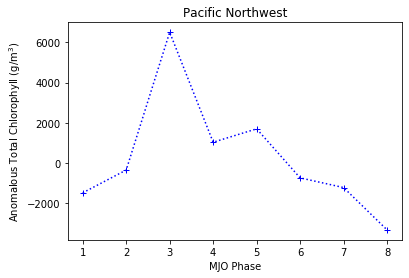

In [131]:

plt.plot(np.arange(1,9), phase_chlor, 'b+:')
plt.title('Pacific Northwest')
plt.xlabel('MJO Phase')
plt.ylabel('Anomalous Total Chlorophyll (g/m$^3$)')

In [48]:
chloro_file_list = glob.glob("ESACCI*")
total_chlor_concentration = np.full(len(chloro_file_list), fill_value=np.nan)
MJO_phase_data = np.genfromtxt('mjo_phase_data.csv', delimiter=',')
daily_MJO_phase = np.full(len(chloro_file_list), fill_value=np.nan)
for i, chloro_file in enumerate(chloro_file_list):
    clear_output(wait=True)
    print(i/len(chloro_file_list))
    data = xr.open_dataset(chloro_file)
    total_chlor_concentration[i] = data.chlor_a.sel(lat=slice(60, 35), lon=slice(-160, -120)).squeeze().sum()
    daily_MJO_phase[i] = MJO_phase_data[i+1][3]

In [39]:
data.chlor_a.sel(lat=slice(60, 35), lon=slice(-160, -120)).squeeze().mean()

<xarray.DataArray 'chlor_a' ()>
array(0.59844214, dtype=float32)
Coordinates:
    time     datetime64[ns] 2010-06-01

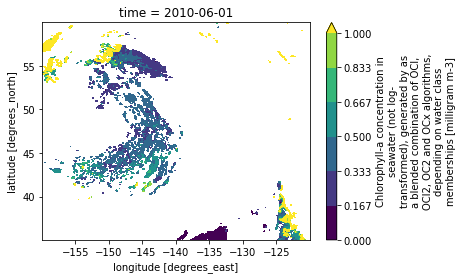

In [40]:
xr.plot.contourf(data.chlor_a.sel(lat=slice(60,35), lon=slice(-160, -120)).squeeze(), vmin=0, vmax=1)

In [16]:
with zipfile.ZipFile('/home/disk/p/pangulo/ResearchDerby_2022/chloro_2010_06.zip', 'r') as zipObj:
    listOfiles = zipObj.namelist()
    data = zipObj.read(listOfiles[0])
    for elem in listOfiles:
        print(elem)

ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100617-fv5.0.1.nc
ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100629-fv5.0.1.nc
ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100625-fv5.0.1.nc
ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100621-fv5.0.1.nc
ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100604-fv5.0.1.nc
ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100607-fv5.0.1.nc
ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100619-fv5.0.1.nc
ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100620-fv5.0.1.nc
ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100623-fv5.0.1.nc
ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100616-fv5.0.1.nc
ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100602-fv5.0.1.nc
ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100624-fv5.0.1.nc
ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100606-fv5.0.1.nc
ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_

In [22]:
from scipy.io import netcdf

In [23]:
file2read = netcdf.NetCDFFile(data,'r')

ValueError: embedded null byte